In [1]:
# %% Doc setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sidetable as stb
import altair as alt
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sidetable as stb
import spacy, matplotlib, vega, portpicker, plotly, altair_viewer, chart_studio
import altair as alt
import chart_studio.plotly as py
import datapane as dp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sidetable as stb
import spacy, matplotlib, vega, portpicker, plotly, altair_viewer, chart_studio, itertools, os, re

import altair as alt
import chart_studio.plotly as py
import datapane as dp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sidetable as stb
import spacy, matplotlib, vega, portpicker, plotly, altair_viewer, chart_studio, itertools, os, re

from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

from PIL import Image
from itertools import chain
from wordcloud import WordCloud
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [2]:
# %% read in att and chunk dfs from csv
att_df_read=pd.read_csv("att_df.csv", encoding="utf-8")
att_df_read.Tag=att_df_read.Tag.replace("\-","_",regex=True)
att_df_read.HeadTag=att_df_read.HeadTag.replace("\-","_",regex=True)

In [3]:
#%%  dicts & translation functions

pdt_dict={
    'POS':'Part of Speech (Simple)',
    'Dep':'Syntactic Dependency',
    'Tag':'Part of Speech (Detailed)'
    }
ht_dict={
    '':'Token',
    'Head':'Syntatctic Head'
    }
tag_dict={
    u'名詞_普通名詞_副詞可能':'Noun; Common Noun; Adverb Possible',
    u'動詞_一般':'Verb; General',
    u'動詞_非自立可能':'Verb; Dependent Possible',
    u'名詞_普通名詞_サ変可能':'Noun; Common Noun; Irregular Conjugation Possible',
    u'名詞_普通名詞_一般':'Noun; Common Noun; General',
    u'代名詞':'Pronoun',
    u'名詞_固有名詞_一般':'Noun; Proper Noun; General',
    u'副詞':'Adverb ',
    u'形状詞_一般':'Adjectival Noun; General',
    u'名詞_普通名詞_形状詞可能':'Noun; Common Noun; Adjectival Noun Possible',
    u'形状詞_助動詞語幹':'Adjectival Noun; Auxiliary Verb Stem',
    u'形容詞_非自立可能':'Adjective; Dependent Possible',
    u'接尾辞_名詞的_一般':'Suffix; Nominal; General',
    u'助詞_接続助詞':'Particle; Conjunction Particle',
    u'名詞_普通名詞_助数詞可能':'Noun; Common Noun; Counter Possible',
    u'助詞_格助詞':'Particle; Case Marking Particle',
    u'名詞_普通名詞_サ変形状詞可能':'Noun; Common Noun; Irregular Conjugation Adjectival Noun Possible',
    u'形容詞_一般':'Adjective; General',
    u'連体詞':'Adnominal Adjective',
    u'接続詞':'Conjunction',
    u'名詞_固有名詞_人名_一般':'Noun; Proper Noun; Person Name; General',
    u'名詞_固有名詞_人名_名':'Noun; Proper Noun; Person Name; Given Name',
    u'助詞_係助詞':'Particle; Linking Particle',
    u'助詞_副助詞':'Particle; Adverbial Particle',
    u'感動詞_フィラー':'Interjection; Filler',
    u'名詞_固有名詞_人名_姓':'Noun; Proper Noun; Person Name; Surname',
    u'名詞_固有名詞_地名_一般':'Noun; Proper Noun; Place Name; General',
    u'接尾辞_名詞的_副詞可能':'Suffix; Nominal; Adverb  Possible',
    u'助動詞':'Auxiliary Verb',
    u'接尾辞_名詞的_助数詞':'Suffix; Nominal; Counter',
    u'接尾辞_形状詞的':'Suffix; Adjectival Nominal',
    u'名詞_数詞':'Noun; Number',
    u'形状詞_タリ':'Adjectival Noun; Tari',
    u'助詞_終助詞':'Particle; Sentence Ending Particle',
    u'感動詞_一般':'Interjection; General',
    u'名詞_固有名詞_地名_国':'Noun; Proper Noun; Place Name; Country',
    u'接尾辞_動詞的':'Suffix; Verbal',
    u'接頭辞':'Prefix',
    u'記号_一般':'Symbol; General',
    u'接尾辞_形容詞的':'Suffix; Adjectival',
    u'名詞_助動詞語幹':'Noun; Auxiliary Verb Stem',
    u'接尾辞_名詞的_サ変可能':'Suffix; Nominal; Irregular Conjugation Possible',
    u'補助記号_句点':'Supplementary Symbol; Period',
    u'補助記号_一般':'Supplementary Symbol; General',
    u'補助記号_読点':'Supplementary Symbol; Comma',
    u'助詞_準体助詞':'Particle; Phrasal Particle'
    }



In [4]:

# %% particle dfs & eda
particle_df=att_df_read[att_df_read.Tag.str.contains("助詞")]
particle_stb = particle_df.stb.freq(["Token"])[:]
particle_stb_ext = particle_df.stb.freq(["Token","POS","Tag","Dep","HeadPOS","HeadTag","HeadDep"])[:]

print(particle_df.head())
print(particle_stb.head())

    Unnamed: 0 Token Head HeadPOS  ...    POS      Tag   Dep Children
5            5     は    時    NOUN  ...    ADP   助詞_係助詞  case       []
8            8     に   途中    NOUN  ...    ADP   助詞_格助詞  case       []
10          10     の   瘢痕    NOUN  ...    ADP   助詞_格助詞  case       []
12          12     が   隆起    NOUN  ...    ADP   助詞_格助詞  case       []
15          15     の   あっ    VERB  ...  SCONJ  助詞_準体助詞  mark       []

[5 rows x 13 columns]
  Token  count    percent  cumulative_count  cumulative_percent
0     は  40794  17.882850             40794           17.882850
1     の  31315  13.727545             72109           31.610395
2     に  25882  11.345882             97991           42.956277
3     を  24391  10.692273            122382           53.648550
4     て  23635  10.360866            146017           64.009416


In [5]:

# %% split
def particledf_split (particle):
    data = particle_df[particle_df.Token==particle]
    df = pd.DataFrame(data)
    side = pd.DataFrame(particle_df[particle_df.Token==particle].stb.freq(["POS","Tag","Dep","HeadPOS","HeadTag","HeadDep"]))
    df.to_csv("outputs/"+particle+"_df.csv")
    side.to_csv("outputs/"+particle+"_stb.csv")
    return df,side


[[-732323008      22055  429782128 ...        255        255        255]
 [       255        255        255 ...        255        255        255]
 [       255        255        255 ...        255        255        255]
 ...
 [       255  822083584 -301989888 ...        255        255        255]
 [       255        255  771751936 ...        255        255        255]
 [       255        255        255 ...        255        255        255]]


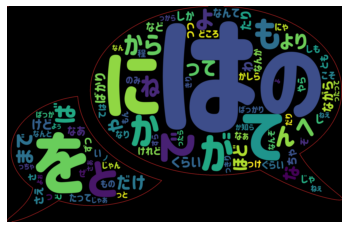

In [7]:
# %% cloud
bubble_mask=np.array(Image.open("data/mask.png"))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
bubble_mask = np.ndarray((bubble_mask.shape[0],bubble_mask.shape[1]), np.int32)

for i in range(len(bubble_mask)):
    bubble_mask[i] = list(map(transform_format, bubble_mask[i]))

print(bubble_mask)
particle_cloud = WordCloud(width=2400,
                           height=1600,
                           min_font_size=40,
                           max_font_size=800,
                           prefer_horizontal=.7,
                           relative_scaling=0,
                           font_path="data/corp_round_v1.ttf",
                           background_color="black",
                           collocations = False,
                           mask=bubble_mask,
                           contour_width=3,
                           contour_color='firebrick'
                           ).generate_from_frequencies(dict(particle_stb[["Token","count"]].values.tolist()))
plt.imshow(particle_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#particle_cloud.to_file("outputs/particle_cloud.png")


In [8]:
#%%
alt.themes.enable('dark')

top25=particle_df.Token.value_counts()[:25].index.tolist()
print(top25)

top10=particle_df.Token.value_counts()[:10].index.tolist()
print(top10)

coi=["は","が","に","へ","で","と","も","か","や","ね","よ","わ","さ","な","ん","と","って"]
print(coi)

['は', 'の', 'に', 'を', 'て', 'が', 'と', 'で', 'か', 'も', 'から', 'よ', 'ん', 'ば', 'へ', 'ね', 'って', 'まで', 'より', 'な', 'だけ', 'や', 'ほど', 'くらい', 'ながら']
['は', 'の', 'に', 'を', 'て', 'が', 'と', 'で', 'か', 'も']
['は', 'が', 'に', 'へ', 'で', 'と', 'も', 'か', 'や', 'ね', 'よ', 'わ', 'さ', 'な', 'ん', 'と', 'って']


In [11]:
#%% head stacked
stacked_headpos=alt.Chart(particle_stb_ext[particle_stb_ext["Token"].isin(top10)]).mark_bar().encode(
    x=alt.X('sum(percent)', stack="normalize"),
    y='Token',
    color="HeadPOS")
stacked_headtag=alt.Chart(particle_stb_ext[particle_stb_ext["Token"].isin(top10)]).mark_bar().encode(
    x=alt.X('sum(percent)', stack="normalize"),
    y='Token',
    color="HeadTag")
stacked_headdep=alt.Chart(particle_stb_ext[particle_stb_ext["Token"].isin(top10)]).mark_bar().encode(
    x=alt.X('sum(percent)', stack="normalize"),
    y='Token',
    color="HeadDep")

top10_head_stacked=alt.vconcat(stacked_headpos, stacked_headtag, stacked_headdep).resolve_scale(
    color='independent')
top10_head_stacked.save(
    "outputs/top10_head_stacked.html")
top10_head_stacked.show()

Displaying chart at http://localhost:20892/
Opening in existing browser session.


In [12]:
#%% stacked
stacked_pos=alt.Chart(particle_stb_ext[particle_stb_ext["Token"].isin(top10)]).mark_bar().encode(
    x=alt.X('sum(percent)', stack="normalize"),
    y='Token',
    color="POS")
stacked_tag=alt.Chart(particle_stb_ext[particle_stb_ext["Token"].isin(top10)]).mark_bar().encode(
    x=alt.X('sum(percent)', stack="normalize"),
    y='Token',
    color="Tag")
stacked_dep=alt.Chart(particle_stb_ext[particle_stb_ext["Token"].isin(top10)]).mark_bar().encode(
    x=alt.X('sum(percent)', stack="normalize"),
    y='Token',
    color="Dep")

top10_stacked=alt.vconcat(stacked_pos, stacked_tag, stacked_dep).resolve_scale(
    color='independent')
top10_stacked.save(
    "outputs/top10_stacked.html")
top10_stacked.show()

Displaying chart at http://localhost:20892/
Opening in existing browser session.


In [14]:
#%% sankey 
#https://gist.github.com/ken333135/09f8793fff5a6df28558b17e516f91ab#file-gensankey
sankey_df = particle_stb_ext[["Token","POS","Tag","Dep","count"]][particle_stb_ext["Token"].isin(top10)]
sankey_Head_df = particle_stb_ext[["Token","HeadPOS","HeadTag","HeadDep","count"]][particle_stb_ext["Token"].isin(top10)]


def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#000003', '#410967', '#932567', '#DC5039', '#FBA40A', '#FCFEA4']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 25,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 15
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

sankey_dict = genSankey(sankey_df,
          cat_cols=["Token","Dep","POS","Tag"],
          value_cols='count',
          title='Top 10 Particles: Sankey (Token)')
sankey_Head_dict = genSankey(sankey_Head_df,
          cat_cols=["Token","HeadDep","HeadPOS","HeadTag"],
          value_cols='count',
          title='Top 10 Particles: Sankey (Syntactic Head)')


sankey=plotly.offline.plot(sankey_dict,
                           filename="outputs/sankey.html",
                           validate=False,
                           auto_open=False)
sankey_Head=plotly.offline.plot(sankey_Head_dict,
                           filename="outputs/sankey_Head.html",
                           validate=False,
                           auto_open=False)



AttributeError: 'str' object has no attribute 'show'

In [ ]:
#%% lists & notes
coi=["は","が","に","へ","で","と","も","か","や","ね","よ","わ","さ","な","ん","と","って"]
coi1=["は","と","か","と"]
coi2=["が","も","や","って"]
coi_div=[[str(i),str(j)] for i,j in zip(coi1,coi2)]
coi3=["に","へ","で"]
coi4=["ね","よ","わ","さ","な","ん"]

ht_list=["","Head"]
pdt_list=["POS","Tag","Dep"]
df_list=[
    'div_HeadDep',
 'div_HeadPOS',
 'div_HeadTag',
 'div_Dep',
 'div_POS',
 'div_Tag',
 'grpd_HeadDep',
 'grpd_HeadPOS',
 'grpd_HeadTag',
 'grpd_Dep',
 'grpd_POS',
 'grpd_Tag']

"""
[[x+y] for x in ht_list for y in pdt_list]

#'Token', 'Head', 'HeadPOS', 'HeadTag', 'HeadDep', 'Lemma', 'Norm', 'Stop', 'POS', 'Tag', 'Dep', 'Children'

"""

In [ ]:
# %% comp dfs

def div_dfs (particle1, particle2, head_token, pos_tag_dep):
    
    #seed_df
    seed1=particle_df[particle_df.Token==particle1].stb.freq([(str(head_token)+str(pos_tag_dep))])[[(str(head_token)+str(pos_tag_dep)),"percent"]]
    seed2=particle_df[particle_df.Token==particle2].stb.freq([(str(head_token)+str(pos_tag_dep))])[[(str(head_token)+str(pos_tag_dep)),"percent"]]
    seed_comb=pd.merge(seed1, seed2, on=(str(head_token)+str(pos_tag_dep)), how="outer", suffixes=("_"+particle1,"_"+particle2)).sort_values(by=(str(head_token)+str(pos_tag_dep))).fillna(0) 
    
    if pos_tag_dep=="Tag": seed_comb["Explain"]=[tag_dict[i] for i in seed_comb[(str(head_token)+str(pos_tag_dep))]]
    else: seed_comb["Explain"]=[spacy.explain(i) for i in seed_comb[(str(head_token)+str(pos_tag_dep))]]
    
    seed_comb.Explain.replace(to_replace=np.nan, value="Root", inplace=True)
    seed_comb.Explain=[i.capitalize() for i in seed_comb.Explain]
    
    #diverging
    div=seed_comb[(seed_comb[("percent_"+str(particle1))]>2) | (seed_comb[("percent_"+str(particle2))]>2)]
    div[str(("percent_"+str(particle1)))]=-div[str(("percent_"+str(particle1)))]
    div["zero"]=0
    
    return div


def div_dict_func ():
    
    particle_df_list=[]  
    for a,b,c,d in [[w,x,y,z] for w in coi1 for x in coi2 for y in ht_list for z in pdt_list]:
            particle_df_list.append(a+b+c+d)
            exec(f"div_{a+b+c+d} = div_dfs(a,b,c,d)")
            
    div_dict={}
    for i in particle_df_list:
        div_dict[i]=pd.DataFrame(eval("div_"+i))
        
    return div_dict


div_df_dict = div_dict_func()




In [ ]:

# %% diverging

def diverging_single (df_key):
    
    alt.themes.enable('dark')
    
    df_match=pd.DataFrame(div_df_dict[df_key])
    ht=re.sub(r"[\[\]\'あ-ん]","",str(df_key)).replace("div_","")[:-3]
    pdt=re.sub(r"[\[\]\'あ-ん]","",str(df_key)).replace("div_","").replace("Head","")
    p1=df_match.columns[1].replace("percent_","")
    p2=df_match.columns[2].replace("percent_","")
    
    df_match.columns=['a', 'b', 'c', 'Explain', 'zero']
    
    basechart = alt.Chart(df_match).mark_bar().encode(
        x=alt.X("threshold:Q",scale=alt.Scale(domain=(-100,100)),title="% of Occurences"),
        y=alt.Y('Explain:N',
                axis=alt.Axis(title=ht_dict[ht]+" "+pdt_dict[pdt],
                              titlePadding=20,
                              offset=15,
                              ticks=False,
                              minExtent=60,
                              labelLimit=100,
                              domain=False)))
    d1 = alt.Chart(df_match).mark_bar().encode(
        x='b:Q',
        x2='zero:Q',
        y=alt.Y('Explain:N', axis=alt.Axis(offset=5,ticks=False,minExtent=60,domain=False)),
        color=alt.Color("b:Q",
            scale=alt.Scale(scheme="inferno",domain=[-100, 0]),
            legend=None),
        tooltip=['Explain'])
    d2 = alt.Chart(df_match).mark_bar().encode(
        x='zero:Q',
        x2='c:Q',
        y=alt.Y('Explain:N', axis=alt.Axis(offset=5,ticks=False,minExtent=60,domain=False)),
        color=alt.Color("c:Q",
            scale=alt.Scale(scheme="inferno",domain=[0, 100]),
            legend=None),
        tooltip=['Explain'])     
    zeroaxis = alt.Chart(df_match).mark_rule().encode(x='zero:Q')

    d=(basechart+d1+d2+zeroaxis).properties(
        width=725,
        height=300)
    #d.save(str("outputs/diverging_"+p1+p2+ht+pdt+".html"))
    return d


#%% div
def diverging_six (p1,p2):
    
    six_list=[
        str(p1+p2+"Dep"),
        str(p1+p2+"POS"),
        str(p1+p2+"Tag"),
        str(p1+p2+"HeadDep"),
        str(p1+p2+"HeadPOS"),
        str(p1+p2+"HeadTag"),
        ]
    
    v=alt.vconcat(
                  diverging_single(six_list[0]),
                  diverging_single(six_list[1]),
                  diverging_single(six_list[2]),
                  diverging_single(six_list[3]),
                  diverging_single(six_list[4]),
                  diverging_single(six_list[5]),
            title=str(p1+" "*4+"|"+" "*4+p2),
            center=True,
            bounds="full").configure(
                        padding={"left": 15, "top": 25, "right": 50, "bottom": 25}
                        ).configure_axisX(
            labelFontSize=15,
            titleFontSize=20).configure_axisY(
                labelFontSize=12,
                titleFontSize=20).configure_title(
                    align="center",
                    anchor="middle",
                    dx=80,
                    fontSize=125)

    v.save(str("outputs/diverging_six"+p1+p2+".html"))
    return v

for a,b in coi_div:
    exec(f"div_six_{a+b} = diverging_six(a,b)")


In [ ]:

#%% grpd dfs

coi3=["に","へ","で"]
coi4=["ね","よ","わ","さ","な","ん"]
  
def grpd_dfs (coi_list, head_token, pos_tag_dep):
    
    #seed_df
    grpd_seed=pd.DataFrame(columns=[(str(head_token)+str(pos_tag_dep))])
    for i in coi_list:
        seed=particle_df[particle_df.Token==i].stb.freq([(str(head_token)+str(pos_tag_dep))])[[(str(head_token)+str(pos_tag_dep)),"percent"]]
        grpd_seed=pd.merge(grpd_seed, seed, on=(str(head_token)+str(pos_tag_dep)), how="outer").sort_values(by=(str(head_token)+str(pos_tag_dep))).fillna(0) 
    grpd_seed.columns=[(str(head_token)+str(pos_tag_dep))]+["percent_"+i for i in coi_list]

    if pos_tag_dep=="Tag": grpd_seed["Explain"]=[tag_dict[i] for i in grpd_seed[(str(head_token)+str(pos_tag_dep))]]
    else: grpd_seed["Explain"]=[spacy.explain(i) for i in grpd_seed[(str(head_token)+str(pos_tag_dep))]]
    
    grpd_seed.Explain.replace(to_replace=np.nan, value="Root", inplace=True)
    grpd_seed.Explain=[i.capitalize() for i in grpd_seed.Explain]
   
    #grouped
    grpd=grpd_seed.melt(id_vars=[(str(head_token)+str(pos_tag_dep)),"Explain"])
    grpd=grpd[grpd["value"]>2]
    
    return grpd
 
    
coi3_df_list=[]
for a,b in [[x,y] for x in ht_list for y in pdt_list]:
    coi3_df_list.append("grpd_coi3_"+a+b)
    exec(f"grpd_coi3_{a+b} = grpd_dfs(coi3,a,b)")


coi4_df_list=[]
for a,b in [[x,y] for x in ht_list for y in pdt_list]:
    coi4_df_list.append("grpd_coi4_"+a+b)
    exec(f"grpd_coi4_{a+b} = grpd_dfs(coi4,a,b)")



In [ ]:
#%% grouped 


def grouped_single (df_name):
    
    alt.themes.enable('dark')
    
    df_match=pd.DataFrame(eval(df_name))
    ht=re.sub(r"[\[\]\']","",str(df_name)).replace("grpd_","").replace("coi3_","").replace("coi4_","")[:-3]
    pdt=re.sub(r"[\[\]\']","",str(df_name)).replace("grpd_","").replace("coi3_","").replace("coi4_","").replace("Head","")
    pn=re.sub(r"[\[\]\'_]","",str(df_name)).replace("grpd","").replace(ht,"").replace(pdt,"")
    pn=str(eval(pn))
    
    df_match.columns=['a', 'Explain', 'variable', 'value']
    df_match.variable= [i.replace("percent_","") for i in df_match.variable]
    
    g=alt.Chart(df_match).mark_bar().encode(
        x=alt.X('value:Q',title="% of Occurences"),
        y=alt.Y('variable:O', 
                axis=alt.Axis(title=None,
                              titlePadding=20,
                              offset=15,
                              ticks=False,
                              minExtent=60,
                              labelLimit=100,
                              domain=False)),
    color=alt.Color("variable:N", scale=alt.Scale(scheme="inferno"), legend=None),
    row=alt.Row("a:N", 
        title=ht_dict[ht]+" "+pdt_dict[pdt]),
    tooltip=["Explain"]).configure(
                        padding={"left": 15, "top": 25, "right": 75, "bottom": 25}
                        ).configure_axisX(
            labelFontSize=15,
            titleFontSize=20).configure_axisY(
                labelFontSize=15,
                titleFontSize=20).configure_title(
                    align="center",
                    anchor="middle",
                    dx=50,
                    fontSize=50).properties(title=re.sub(r"[\[\]\']","",str(pn)).replace(",","    "),
                                            width=725)
    g.save(str("outputs/grouped_"+ht+pdt+re.sub(r"[\[\]\' ]","",str(pn)).replace(",","")+".html"))
    return g


for i in coi3_df_list:
    exec(f"{i}_chart = grouped_single(i)")
    
    
for i in coi4_df_list:
    exec(f"{i}_chart = grouped_single(i)")    
    

